## Tokenized news를 TFIDF로 벡터화

In [27]:
import pandas as pd
import numpy as np
import re
from konlpy.tag import Okt
import numpy as np
import pandas as pd
import json
import os
from collections import defaultdict
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples, silhouette_score

In [28]:
df_tmp = pd.read_csv('../data/tokenized_news/tokenized_all')

In [29]:
df_tmp = df_tmp.drop(columns='Unnamed: 0')

In [30]:
tfidf_vect = TfidfVectorizer(max_df=0.95)

#opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(df_tmp['title_V'].apply(lambda x: np.str_(x)))

In [31]:
from sklearn.cluster import KMeans

# 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0 
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [32]:
df_tmp['cluster_label'] = cluster_label
df_tmp

,title,text,url,media,date,text_V,title_V,cluster_label
0,무너지는 일과 삶의 경계···노동이 녹아내린다,이 땅에서 ‘비정규직’이라는 표현이 광범위하게 쓰인 지 20여년. 정부가 신규 일자...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01,"비정규직, 표현, 정부, 신규, 일자리, 비정규직, 정규직, 전환, 주력, 사이, ...","일과, 경계, 노동",0
1,일자리 아닌 일거리···'일정치 않음'을 살다 [녹아내리는 노동],ㆍ①일자리보다 일거리\n\n노동의 미래를 모두 알 수는 없다. 다만 현실에서 일어나...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01,"일자리, 일거리, 노동, 미래, 현실, 변화, 사회, 준비, 짐작, 노동, 미래, ...","일자리, 일거리, 정치, 노동",0
2,이곳은…기계의 정확도 높이는 ‘인간부품’ 육성공장 아닐까 [녹아내리는 노동],ㆍ①일자리보다 일거리\n\nㆍAI 학습데이터 가공 기업 ‘크라우드웍스’ 교육장 참관...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01,"일자리, 일거리, 학습, 데이터, 가공, 기업, 우드, 웍스, 교육장, 참관, 소화...","기계, 정확도, 인간, 부품, 육성, 공장, 노동",0
3,"지혜씨, 지훈씨를 부탁해! [인포그래픽]",새로 태어나는 아이들은 줄어들고 어르신들은 계속 나이를 먹어 갑니다. 2020년 새...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01,"어르신, 계속, 나이, 새해, 크게, 정부, 정책, 발표, 혜택, 저출산, 고령, ...","지혜, 지훈, 부탁, 인포그래픽",0
4,"[20대 리포트] “20대, 함부로 판단말라… 내 길 내가 간다”",새천년의 시작과 함께 세상에 나온 2000년대생들이 어느덧 사회 변화를 이끌 20대...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-01-01,"새천년, 시작, 세상, 년대, 사회, 변화, 대가, 밀레니엄, 베이비, 세대, 분류...","리포트, 함부로, 판단, 간다",0
...,...,...,...,...,...,...,...,...
29036,"""2.5단계로 무급휴가 요구""… 코로나 재유행에 살아난 '갑질'",직장인 A씨는 수도권 사회적 거리두기 2.5단계를 시행하는 30일부터 다음달 6일...,https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-31,"직장인, 수도권, 사회, 거리, 두기, 단계, 시행, 일간, 무급, 휴가, 사용, ...","단계, 무급, 휴가, 요구, 코로나, 유행",2
29037,모호한 조치ㆍ 깜깜이 환자 비율 40%육박... 거리두기 2.5단계 효과 있을까,"30일 0시부터 서울 전역에 강화된 사회적 거리두기(2.5단계)가 시행됐지만, 전문...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-31,"서울, 전역, 강화, 사회, 거리, 두기, 단계, 시행, 전문가, 방역, 효과, 의...","조치, 환자, 비율, 육박, 거리, 두기, 단계, 효과",0
29038,내일부터 서울 시내버스 밤 9시 이후 20% 감축… 주말 수준으로,수도권의 ‘사회적 거리두기’ 2.5단계 시행 기간에 맞춰 서울 시내버스의 야간 운행...,https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-31,"수도권, 사회, 거리, 두기, 단계, 시행, 기간, 서울, 시내버스, 야간, 운행,...","내일, 서울, 시내버스, 감축, 주말, 수준",0
29039,집단휴업 두고 전공의 vs 정부 '강대강 대치'... 의료공백 장기화 불가피,21일부터 10일째 무기한 집단휴진을 이어가고 있는 전공의(인턴ㆍ레지던트)들과 정부...,https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-31,"무기한, 집단, 어가, 전공, 인턴, 레지던트, 정부, 갈등, 벼랑, 의협, 의회,...","집단, 휴업, 전공, 정부, 대강, 대치, 의료, 공백, 장기, 불가피",0


In [33]:
tmp_df = df_tmp

In [47]:
tmp_df['title'][tmp_df['cluster_label']==2]

2220                             ‘우한 폐렴’ 국내 첫 확진… 설 앞 방역비상
2233                                 국내서 中신종폐렴 첫 확진… 확산 비상
2464                      시진핑 “확산 막아라”…확진자 하루 60명 늘자 우한 봉쇄
2496              ‘우한 폐렴’ 미국으로…전 세계로 확산 공포 [‘우한 폐렴’ 확산 공포]
2737             중, ‘신종 코로나’ 사망 17명 정보공개…“대부분 기저질환 60~80대”
                               ...                        
28997    [팔면봉] 與 선장 된 이낙연, 靑엔 할 말 하고 野와 협치하고 코로나 이겨 정권 ...
29001                               코로나에 흩어진 우리, 일주일만 견뎌내요
29013                        이낙연 대권가도, 코로나 극복·서울시장 보선에 달렸다
29017                                    코로나 난국 한복판에 선 이낙연
29036                  "2.5단계로 무급휴가 요구"… 코로나 재유행에 살아난 '갑질'
Name: title, Length: 2841, dtype: object

In [34]:
tmp_df[tmp_df['cluster_label']==0].sort_values(by='date')

,title,text,url,media,date,text_V,title_V,cluster_label
0,무너지는 일과 삶의 경계···노동이 녹아내린다,이 땅에서 ‘비정규직’이라는 표현이 광범위하게 쓰인 지 20여년. 정부가 신규 일자...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01,"비정규직, 표현, 정부, 신규, 일자리, 비정규직, 정규직, 전환, 주력, 사이, ...","일과, 경계, 노동",0
61,"""기자는 진실의 목격자, 우릴 믿어야할 이유를 독자에게 증명하라""",[조선일보 100년 / 진실의 수호자들] 영화 '스포트라이트' 실제인물 마틴 배런 ...,https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-01-01,"진실, 호자, 영화, 스포트라이트, 실제, 인물, 마틴, 배런, 편집국, 인터뷰, ...","기자, 진실, 목격자, 우릴, 이유, 독자, 증명",0
60,가짜가 진짜보다 6배 빨리 퍼진다… 인류 파괴하는 '거짓 정보',[조선일보 100년 / 진실의 수호자들] [1] 저널리즘의 도전: 민주주의를 위협하...,https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-01-01,"진실, 호자, 저널리즘, 도전, 민주주의, 위협, 가짜, 전쟁, 대선, 힐러리, 아...","가짜, 진짜, 인류, 파괴, 거짓, 정보",0
59,"""진짜뉴스는 비싸다, 때론 목숨까지 건다""",[조선일보 100년 / 진실의 수호자들] [1] 저널리즘의 도전: 민주주의를 위협하...,https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-01-01,"진실, 호자, 저널리즘, 도전, 민주주의, 위협, 가짜, 전쟁, 거짓, 정보, 손가...","진짜, 뉴스, 때론, 목숨",0
58,"""아들 美대학 시험, 조국부부가 대신 풀어줘 A학점""","檢 ""아들이 문제 사진찍어 보내면 부부가 답안 적어 다시 美 보내… 美대학 장학증명...",https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-01-01,"아들, 문제, 사진, 부부, 답안, 다시, 대학, 장학, 증명서, 위조, 국회, 제...","아들, 대학, 시험, 조국, 부부, 대신, 학점",0
...,...,...,...,...,...,...,...,...
28943,블라인드 치고 꼼수영업… 편의점앞 술판… 대면예배 고수,"- 곳곳서 방역수칙 위반\n\n편의점앞 자리없어 돌아가기도\n\n서울시, 음식점 특...",https://news.naver.com/main/read.nhn?mode=LPOD...,문화일보,2020-08-31,"곳곳, 방역, 칙, 위반, 편의점, 앞, 자리, 서울시, 음식점, 특별, 전수, 점...","블라인드, 꼼수, 영업, 편의점, 앞, 술판, 대면, 예배, 고수",0
28945,"민주당, 2차 재난지원금 지급·4차 추경 논의 가속도",이르면 내일 고위 당정청 개최\n\n추석 민생대책으로 내놓을수도\n\n더불어민주당이...,https://news.naver.com/main/read.nhn?mode=LPOD...,문화일보,2020-08-31,"내일, 고위, 정청, 개최, 추석, 민생, 대책, 민주당, 재난, 원금, 지급, 추...","민주당, 재난, 원금, 지급, 추경, 논의, 가속도",0
28946,갈등 조정 못한채 ‘휴진 피해신고센터’ 운영… 화 키우는 정부,전임의 집단사직 부채질 \n\n진료연기·수술취소 피해 접수 \n\n대응절차·법률...,https://news.naver.com/main/read.nhn?mode=LPOD...,문화일보,2020-08-31,"전임, 집단, 사직, 부채질, 진료, 연기, 수술, 취소, 피해, 접수, 대응, 절...","갈등, 조정, 피해, 신고, 센터, 운영, 정부",0
28939,2주 연속 200명이상 확진…‘깜깜이’ 잡아야 확산세 꺾는다,지난주도 주후반에 급속 확산 \n\n깜깜이 환자 21.5%로 최고치 \n\n전주 패...,https://news.naver.com/main/read.nhn?mode=LPOD...,문화일보,2020-08-31,"지난주, 후반, 급속, 확산, 깜깜, 환자, 최고, 전주, 패턴, 답습, 땐, 단계...","연속, 확진, 깜깜, 확산",0


In [35]:
tmp_df[tmp_df['cluster_label']==1].sort_values(by='date')

,title,text,url,media,date,text_V,title_V,cluster_label
99,[국민만평-서민호 화백] 2020년 1월 2일,서민호 min3018@kmib.co.kr\n\n\n \n\nGoodNews pape...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-01-02,"서민호, 무단, 배포, 금지","국민, 만평, 서민호, 화백",1
220,[국민만평-서민호 화백] 2020년 1월 3일,서민호 min3018@kmib.co.kr\n\n\n \n\nGoodNews pape...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-01-03,"서민호, 무단, 배포, 금지","국민, 만평, 서민호, 화백",1
431,[국민만평-서민호 화백] 2020년 1월 6일,서민호 min3018@kmib.co.kr\n\n\n \n\nGoodNews pape...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-01-06,"서민호, 무단, 배포, 금지","국민, 만평, 서민호, 화백",1
572,[국민만평-서민호 화백] 2020년 1월 7일,서민호 min3018@kmib.co.kr\n\n\n \n\nGoodNews pape...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-01-07,"서민호, 무단, 배포, 금지","국민, 만평, 서민호, 화백",1
720,[국민만평-서민호 화백] 2020년 1월 8일,서민호 min3018@kmib.co.kr\n\n\n \n\nGoodNews pape...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-01-08,"서민호, 무단, 배포, 금지","국민, 만평, 서민호, 화백",1
...,...,...,...,...,...,...,...,...
28215,[국민만평-서민호 화백] 2020년 8월 25일,서민호 min3018@kmib.co.kr\n\n\n\n\nGoodNews paper...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-08-25,"서민호, 무단, 배포, 금지","국민, 만평, 서민호, 화백",1
28369,[국민만평-서민호 화백] 2020년 8월 26일,서민호 min3018@kmib.co.kr\n\n\n\n\nGoodNews paper...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-08-26,"서민호, 무단, 배포, 금지","국민, 만평, 서민호, 화백",1
28517,[국민만평-서민호 화백] 2020년 8월 27일,서민호 min3018@kmib.co.kr\n\n\n\n\nGoodNews paper...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-08-27,"서민호, 무단, 배포, 금지","국민, 만평, 서민호, 화백",1
28668,[국민만평-서민호 화백] 2020년 8월 28일,서민호 min3018@kmib.co.kr\n\n\n\n\nGoodNews paper...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-08-28,"서민호, 무단, 배포, 금지","국민, 만평, 서민호, 화백",1


In [36]:
tmp_df[tmp_df['cluster_label']==2].sort_values(by='title')

,title,text,url,media,date,text_V,title_V,cluster_label
23962,"""100시간에 100만명 감염""... 정점 안 보이는 코로나 확산세",100시간에 100만명 감염.\n\n로이터통신은 18일(현지시간) 급격히 가팔라진 ...,https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-07-20,"감염, 로이터, 통신, 현지, 라진, 신종, 코로나바이러스, 감염증, 코로나, 확산...","감염, 정점, 코로나, 확산",2
29036,"""2.5단계로 무급휴가 요구""… 코로나 재유행에 살아난 '갑질'",직장인 A씨는 수도권 사회적 거리두기 2.5단계를 시행하는 30일부터 다음달 6일...,https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-31,"직장인, 수도권, 사회, 거리, 두기, 단계, 시행, 일간, 무급, 휴가, 사용, ...","단계, 무급, 휴가, 요구, 코로나, 유행",2
16563,"""美 코로나 사망 1명당 1000만달러 손실, 사람부터 살려야 이득""","[아시안리더십콘퍼런스 웨비나] \n배로 교수의 코로나 피해 계산 ""직장 폐쇄 등 셧...",https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-05-21,"아시안, 리더십, 콘퍼런스, 웨비, 교수, 코로나, 피해, 계산, 직장, 폐쇄, 셧...","코로나, 사망, 명당, 달러, 손실, 사람, 이득",2
27311,"""교회發 코로나 대유행 우려"" vs ""신천지 때와는 차이""",수도 서울과 경기 지역에서 신종 코로나바이러스 감염증(코로나19) 확진자가 폭발적으...,https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-17,"수도, 서울, 경기, 지역, 신종, 코로나바이러스, 감염증, 코로나, 진자, 폭발,...","교회, 코로나, 대유행, 우려, 신천지, 차이",2
17706,"""기업 잘되는게 가장 큰 복지, 코로나 위기인 지금이 규제 풀때다""","[코로나 빅뱅, 위기와 기회] [1] 공격적으로 규제 풀어야\n\n\n\t\t\t\...",https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-05-30,"코로나, 빅뱅, 위기, 기회, 공격, 규제, 강호, 중견, 기업, 연합, 회장, 산...","기업, 가장, 복지, 코로나, 위기, 규제, 풀때",2
...,...,...,...,...,...,...,...,...
4833,"후베이성, 임상진단 추가 후 확진자 10배·사망자 2배 늘었다 [‘코로나19’ 확산]","ㆍ중국 정부, 사태 발생 두 달 지나서야 기준 변경…불신 키워\nㆍ타 지역 적용 땐...",https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-02-14,"중국, 정부, 사태, 두, 기준, 변경, 불신, 지역, 적용, 땐, 증가, 부실, ...","후베이성, 진단, 추가, 진자, 사망자, 코로나, 확산",2
25418,"휴스턴 중국 총영사관, 코로나 백신 노렸나…FBI 수사",미국 연방수사국(FBI)이 지난주 폐쇄됐던 텍사스주 휴스턴 주재 중국 총영사관의 스...,https://news.naver.com/main/read.nhn?mode=LPOD...,중앙일보,2020-07-31,"미국, 연방, 사국, 지난주, 폐쇄됐던, 텍사스주, 휴스턴, 주재, 중국, 영사관,...","휴스턴, 중국, 영사관, 코로나, 백신, 수사",2
9384,흡연자 더 취약… 中선 코로나 악화위험 14배,[코로나 팬데믹]\n\n\n흡연자는 코로나 바이러스 감염증에 걸릴 경우 비흡연자보다...,https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-03-23,"코로나, 팬데믹, 흡연, 코로나, 바이러스, 감염증, 흡연, 증상, 악화, 연구, ...","흡연, 취약, 코로나, 악화, 위험",2
8573,"희생·협조의 ‘코로나19 한 달’…대구, 공포를 이겼다",“우리를 지켜주셔서 고맙습니다.”\n\n16일 대구의료원 라파엘웰빙센터에 의료진을 ...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-03-17,"의료, 라파엘, 웰빙, 센터, 의료, 응원, 내용, 편지, 전시, 연필, 지우개, ...","희생, 협조, 코로나, 대구, 공포",2


In [37]:
tmp_df[tmp_df['cluster_label']==3].sort_values(by='title')

,title,text,url,media,date,text_V,title_V,cluster_label


In [38]:
tmp_df[tmp_df['cluster_label']==4].sort_values(by='title')

,title,text,url,media,date,text_V,title_V,cluster_label


In [39]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집화 (리뷰)
km_cluster = KMeans(n_clusters=3, init='k-means++', max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_


# 소속 클러스터를 cluster_label 컬럼으로 할당하고 cluster_label 값으로 정렬
tmp_df['cluster_label'] = cluster_label
tmp_df.sort_values(by='cluster_label')

,title,text,url,media,date,text_V,title_V,cluster_label
0,무너지는 일과 삶의 경계···노동이 녹아내린다,이 땅에서 ‘비정규직’이라는 표현이 광범위하게 쓰인 지 20여년. 정부가 신규 일자...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01,"비정규직, 표현, 정부, 신규, 일자리, 비정규직, 정규직, 전환, 주력, 사이, ...","일과, 경계, 노동",0
19176,남영동 그곳에서…“일상 민주주의 이루자”,그곳에 붉은 꽃이 걸렸다. ‘살인기계’ ‘고문공장’으로 불렸던 곳. 김근태와 박종철...,https://news.naver.com/main/read.nhn?mode=LPOD...,한겨레,2020-06-11,"살인, 기계, 고문, 공장, 김근태, 박종철, 숱, 민주, 인사, 몸, 영혼, 파괴...","남영동, 일상, 민주주의",0
19175,"""美시민단체엔 내부감시자 따로둬, 택시비 1달러까지 따진다""",미국 국세청(IRS)이 비영리 시민단체(NPOs)의 대표이사 운영진의 보수를 포함해...,https://news.naver.com/main/read.nhn?mode=LPOD...,중앙일보,2020-06-11,"미국, 국세청, 비영리, 시민단체, 대표이사, 운영, 진의, 보수, 포함, 부금, ...","시민단체, 내부, 감시자, 택시, 달러",0
19174,"우리회사는 원격근무 어떻게 하지, 해법을 드립니다",신종 코로나바이러스 감염증(코로나19) 사태 이후 재택근무를 경험한 기업과 직장인은...,https://news.naver.com/main/read.nhn?mode=LPOD...,중앙일보,2020-06-11,"신종, 코로나바이러스, 감염증, 코로나, 사태, 재택근무, 경험, 기업, 직장인, ...","회사, 근무, 해법",0
19173,"TSMC 3나노공정, 삼성 앞서간다",글로벌 1위 반도체 위탁생산업체(파운드리)인 대만의 TSMC가 3나노 반도체 설비 ...,https://news.naver.com/main/read.nhn?mode=LPOD...,중앙일보,2020-06-11,"글로벌, 반도체, 위탁, 생산, 업체, 파운드리, 대만, 나노, 반도체, 설비, 구...","나노, 공정, 삼성, 앞서, 간다",0
...,...,...,...,...,...,...,...,...
19351,[수축사회가 온다] 코로나 고용쇼크 20대 후반 ‘잃어버린 세대’ 위기,‘IMF 세대’ 이어 취업 막혀 고통… 한국 사회 인재경쟁력 저하 올 수도\n\n\...,https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-06-12,"세대, 취업, 고통, 한국, 사회, 인재, 경쟁력, 저하, 수도, 신종, 코로나바이...","수축, 사회, 코로나, 고용, 쇼크, 후반, 세대, 위기",2
11822,코로나19 ‘무증상 자가격리자’만 15일 오후 6시 이후에 별도 투표 [선택 4·15],ㆍ정부 “관리자 일대일 동행”\nㆍ투표소 갈 때 대중교통 금지\n\n코로나19 의심...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-04-13,"정부, 관리자, 일대일, 동행, 투표소, 대중교통, 금지, 코로나, 의심, 증상, ...","코로나, 무증상, 자가, 격리, 오후, 별도, 투표, 선택",2
5888,"두 번째 사망, 하루 100명 추가… 코로나 전국 확산 우려","청도대남병원 50대女 사망, 추가확진자 중 대구 신천지 연관 85명\n\n총 204...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-02-22,"청도, 대남, 병원, 사망, 추가, 진자, 대구, 신천지, 연관, 확진, 메르스, ...","두, 사망, 하루, 추가, 코로나, 전국, 확산, 우려",2
11804,코로나 환자 사전투표 '007 작전'... 방호복 무장하고 환자 한 명씩 호출,확진자 완치 가까운 순서로…승강기도 상ㆍ하행 분리 운행\n\n\n\n신종 코로나바이...,https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-04-11,"진자, 완치, 순서, 승강기, 분리, 운행, 신종, 코로나바이러스, 감염증, 코로나...","코로나, 환자, 사전투표, 작전, 방호복, 무장, 환자, 호출",2


In [40]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환함. 
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['title_V']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
        
    return cluster_details

In [41]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
#         print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')

In [42]:
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(
    cluster_model=km_cluster
    , cluster_data=tmp_df
    , feature_names=feature_names
    , clusters_num=3
    , top_n_features=30
)
# top_features : 중심과 가까운 값
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['대통령', '정부', '통합', '한국', '감염', '단독', '민주당', '총선', '확진', '수사', '서울', '트럼프', '국회', '마스크', '원금', '재난', '윤석열', '부동산', '국민', '경제', '주택', '우한', '방역', '진자', '검찰', '입국', '환자', '만원', '김정은', '대구']
####### Cluster 1
Top features: ['서민호', '만평', '화백', '국민', '배소', '배알', '배심원', '배심', '배신자', '배신', '배수진', '배수로', '배수', '배송비', '배송', '힘자랑', '배우', '배석', '배상하', '배상금', '배상', '배분', '배부', '배복', '배반', '배민', '배리', '배려', '배양', '배움']
####### Cluster 2
Top features: ['코로나', '확산', '비상', '신종', '초비상', '감염', '진자', '확진', '대구', '경제', '정부', '방역', '환자', '국내', '대응', '극복', '격리', '신천지', '세계', '우한', '팬데믹', '중국', '검사', '의료', '치료', '위기', '한국', '입국', '사망', '대통령']


- Cluster 0 : 정치
- Cluster 1 : 사회
- Cluster 2 : 경제

In [48]:
score_samples = silhouette_samples(feature_vect, df_tmp['cluster_label'])
print('silhouette_samples return 값의 shape' , score_samples.shape)

silhouette_samples return 값의 shape (29041,)


In [49]:
tmp_df['silhouette_coeff'] = score_samples

In [50]:
# 모든 데이터의 평균 실루엣 계수를 구함
average_score = silhouette_score(feature_vect, tmp_df['cluster_label'])

In [51]:
print('뉴스 타이틀 Silhouette Analysis Score:{0:.3f}'.format(average_score))
tmp_df['silhouette_coeff']

뉴스 타이틀 Silhouette Analysis Score:0.007


0        0.000054
1        0.000245
2       -0.000122
3        0.000038
4        0.000306
           ...   
29036    0.021670
29037   -0.001056
29038    0.000448
29039   -0.001876
29040   -0.000424
Name: silhouette_coeff, Length: 29041, dtype: float64

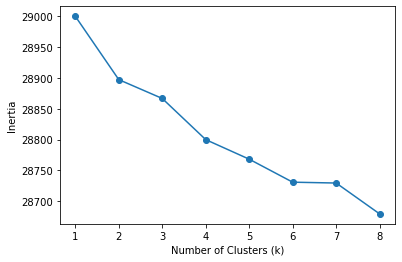

In [41]:
num_clusters = list(range(1, 9))	# K는 1 ~ 8사이의 정수입니다
inertias = [] # centroid와 각 데이터들 사이의 거리를 나타냄
# 각 K별로 모델을 생성하여 inertia를 측정합니다
for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(feature_vect)
    inertias.append(model.inertia_)
# K에 따른 inertia의 변화를 시각화합니다
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()